# 1. Make a function that can take any non-negative integer as an argument and return it with its digits in descending order. 


In [18]:
def descending_fun(default_val = 111111):
    my_in = str(default_val)
    container = []
    if default_val<=0:
        return("positive number needed")
    else:
        for i in my_in:
            container.append(i)
            #sort values in list 
            sorted_list = sorted(my_in, reverse=True)
            #joining the str together 
            my_in= "".join(sorted_list)
            
            return(my_in)
            
    
    
#Input = 43905 Output = 95430
descending_fun(43905)      

'95430'

In [14]:
#Input = 584366 Output = 866543
descending_fun(584366)

'866543'

In [16]:
#If no number is passed in, make the default value inputted = 111111
descending_fun()

'111111'

# 2.  Import jeopardy.csv and create a dataframe from the data. Find out the following:


In [ ]:

#a. How many rows are there in the dataframe? What does a row represent?
#b. How many unique shows were there each year?
#c. Think of another question that this data can help answer. Make that question a
#header in your notebook.
#d. Answer your question and show the steps you used to do so clearly

In [2]:
import pandas as pd
import numpy as np


jep = "JEOPARDY_CSV.csv"
jep_df = pd.read_csv("JEOPARDY_CSV.csv")
jep_df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,12/31/2004,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,12/31/2004,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,12/31/2004,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,12/31/2004,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,12/31/2004,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


# a. How many rows are there in the dataframe? What does a row represent?



In [4]:
#A row represents a line of data within a column of a data frame or across columns of data
len(jep_df)

216930

# b. How many unique shows were there each year?


In [3]:
# group date and shows
jp2=jep_df.groupby( " Air Date")['Show Number'].value_counts()


#jep_df["Year"]=
jep_df.dtypes
# first change Air Date to a date format

jep_df[" Air Date"] = jep_df[" Air Date"].astype('datetime64[ns]')

#then pull year 
jep_df["Year"] = jep_df[" Air Date"].dt.year
jep_df.head()
#grouping the data by year/show and isolating just the unique shows per year
jp2=jep_df.groupby( "Year")['Show Number'].nunique()
print(jp2.head(29))

Year
1984     23
1985     16
1986     25
1987     22
1988     22
1989     36
1990     73
1991     24
1992     32
1993     35
1994     19
1995     19
1996     83
1997    221
1998    223
1999    229
2000    225
2001    203
2002    114
2003    158
2004    220
2005    225
2006    230
2007    231
2008    232
2009    226
2010    231
2011    224
2012     19
Name: Show Number, dtype: int64


#  c&d. What unique question and answer combinations exhit in this data set?


In [22]:
#c. Think of another question that this data can help answer. Make that question a
#header in your notebook.

#grouping question and answer then limiting to the unique combos and counting
jp3=jep_df.groupby(" Question")[" Answer"].value_counts()

print(jp3.head())

 Question                                                                               Answer                                             
" 'Cause I'm never gonna stop the rain by complaini                                    Butch Cassidy and the Sundance Kid                      1
" 'Charge' was the captain's cry; theirs not to reason why, theirs not to make reply"  Alfred Lord Tennyson ("Charge of the Light Brigade")    1
" 'I'm going to the racetrac                                                           Tom Swifty                                              1
" _____  " & " ____ in the Air"                                                        Up                                                      1
" _____ Hills, 90210"                                                                  B-E-V-E-R-L-Y                                           1
Name:  Answer, dtype: int64


# Create any graph using matplotlib that helps you understand the jeopardy data. Explain what your graph shows and why it is useful.


These two plots display the number of qusetions asked across 10 shows. More spefically the top 10 shows with highest and lowest number of questions. From this we can estimate the average amount of questions asked for data provided. We can also deduce that on all other showsbetween aproximately 40 and 60 questions are asked. 

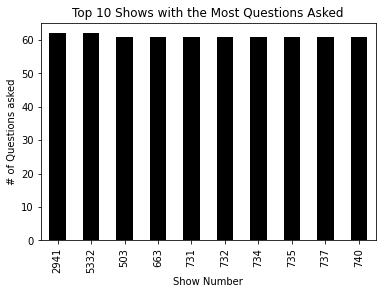

In [89]:
jp2=jep_df.groupby( "Year")['Show Number'].nunique()
jp5=jep_df.groupby( "Show Number")[' Question'].count().nlargest(10) #highest # of questions
jp6=jp5.mean()

#set up for plot
fig, ax = plt.subplots()
# #create bar plot with title
#used ax = because im not using the dataframe directly for the data
ax = jp5.plot(kind = "bar", title ="Top 10 Shows with the Most Questions Asked", color='black') 

#labels
plt.xlabel("Show Number")
plt.ylabel("# of Questions asked")
plt.show()

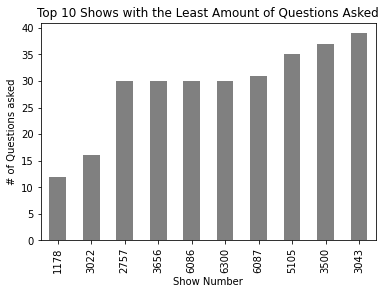

In [95]:
jp2=jep_df.groupby( "Year")['Show Number'].nunique()
jp7=jep_df.groupby( "Show Number")[' Question'].count().nsmallest(10) #lowest number of questions
jp8=jp7.mean()

#set up for plot
fig, ax = plt.subplots()
#create bar plot with title
ax = jp7.plot(kind = "bar", title ="Top 10 Shows with the Least Amount of Questions Asked", color='gray')

#labels
plt.xlabel("Show Number")
plt.ylabel("# of Questions asked")
plt.show()

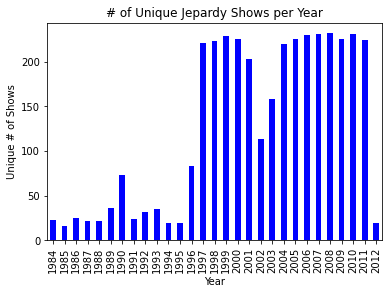

In [88]:
#just working on ploting with bar plots

import matplotlib.pyplot as plt
# df by unique shows year 
jp2=jep_df.groupby( "Year")['Show Number'].nunique()
fig, ax = plt.subplots()
ax = jp2.plot(kind='bar', title ="# of Unique Jepardy Shows per Year",color='blue')
plt.xlabel("Year")
plt.ylabel("Unique # of Shows")
plt.show()